# <font color='blue'> 13.1 IIR Bandpass Elliptic Filter </font>
An elliptical Filter is a special type of Filter used in digital signal processing when there is a need for a fast transition from pass to stop band. 

The specifications are as follows:  
* Pass band frequency: 1400-2100 Hz
* Stop band frequency: 1050-24500 Hz
* Pass band ripple: 0.4dB
* Stop band attenuation: 50 dB
* Sampling frequency: 7 kHz


In [2]:
# import required library 
import numpy as np 
import scipy.signal as signal 
import matplotlib.pyplot as plt

In [3]:
# Function to depict magnitude and phase plot
def mfreqz(b, a, Fs):

	# Compute frequency response of the
	# filter using signal.freqz function
	wz, hz = signal.freqz(b, a)

	# Calculate Magnitude from hz in dB
	Mag = 20*np.log10(abs(hz))

	# Calculate phase angle in degree from hz
	Phase = np.unwrap(np.arctan2(np.imag(hz), 
								np.real(hz)))*(180/np.pi)

	# Calculate frequency in Hz from wz
	Freq = wz*Fs/(2*np.pi)

	# Plot filter magnitude and phase responses using subplot.
	fig = plt.figure(figsize=(10, 6))

	# Plot Magnitude response
	sub1 = plt.subplot(2, 1, 1)
	sub1.plot(Freq, Mag, 'r', linewidth=2)
	sub1.axis([1, Fs/2, -100, 5])
	sub1.set_title('Magnitude Response', fontsize=20)
	sub1.set_xlabel('Frequency [Hz]', fontsize=20)
	sub1.set_ylabel('Magnitude [dB]', fontsize=20)
	sub1.grid()

	# Plot phase angle
	sub2 = plt.subplot(2, 1, 2)
	sub2.plot(Freq, Phase, 'g', linewidth=2)
	sub2.set_ylabel('Phase (degree)', fontsize=20)
	sub2.set_xlabel(r'Frequency (Hz)', fontsize=20)
	sub2.set_title(r'Phase response', fontsize=20)
	sub2.grid()

	plt.subplots_adjust(hspace=0.5)
	fig.tight_layout()
	plt.show()

In [4]:
# Define impz(b,a) to calculate impulse # response and step response of a system
# input: b= an array containing numerator
# coefficients,a= an array containing
# denominator coefficients
def impz(b, a):

	# Define the impulse sequence of length 60
	impulse = np.repeat(0., 60)
	impulse[0] = 1.
	x = np.arange(0, 60)

	# Compute the impulse response
	response = signal.lfilter(b, a, impulse)

	# Plot filter impulse and step response:
	fig = plt.figure(figsize=(10, 6))
	plt.subplot(211)
	plt.stem(x, response, 'm')
	plt.ylabel('Amplitude', fontsize=15)
	plt.xlabel(r'n (samples)', fontsize=15)
	plt.title(r'Impulse response', fontsize=15)

	plt.subplot(212)
	step = np.cumsum(response)

	# Compute step response of the system
	plt.stem(x, step, 'g')
	plt.ylabel('Amplitude', fontsize=15)
	plt.xlabel(r'n (samples)', fontsize=15)
	plt.title(r'Step response', fontsize=15)
	plt.subplots_adjust(hspace=0.5)

	fig.tight_layout()
	plt.show()

In [7]:
# Given specification

Fs = 7000  # Sampling frequency in Hz
fp = np.array([1400, 2100]) # Pass band frequency in Hz
fs = np.array([1050, 2450])# Stop band frequency in Hz
Ap = 0.4 # Pass band ripple in dB
As = 50  # Stop band attenuation in dB

In [8]:
# Compute pass band and stop band edge frequencies

wp = fp/(Fs/2) # Normalized passband edge frequencies w.r.t. Nyquist rate
ws = fs/(Fs/2) # Normalized stopband edge frequencies

In [ ]:
<hr style="border:2px solid gray">

### IIR Bandpass Elliptic Filter

In [9]:
# Compute order of the elliptic filter using signal.ellipord
N, wc = signal.ellipord(wp, ws, Ap, As)

# Design digital elliptic bandpass filter using signal.ellip function
z, p = signal.ellip(N, Ap, As, wc, 'bandpass')

###  IIR Bandpass Butterworth Filter

In [12]:
# Compute order of the digital Butterworth filter using signal.buttord
N, wc = signal.buttord(wp, ws, Ap, As, analog=True)

# Design digital Butterworth band pass with filter using signal.butter function
z, p = signal.butter(N, wc, 'bandpass')

# Compute frequency response of the filter using signal.freqz function
wz, hz = signal.freqz(z, p)

<hr style="border:2px solid gray">

In [13]:
# Print the order of the filter and cutoff frequencies
print('Order of the filter=', N)
print('Cut-off frequency=', wc)

# Print numerator and denomerator with coefficients of the filter
print('Numerator Coefficients:', z)
print('Denominator Coefficients:', p)

Order of the filter= 12
Cut-off frequency= [0.39191295 0.61238089]
Numerator Coefficients: [ 3.19351078e-07  0.00000000e+00 -3.83221293e-06  0.00000000e+00
  2.10771711e-05  0.00000000e+00 -7.02572371e-05  0.00000000e+00
  1.58078783e-04  0.00000000e+00 -2.52926054e-04  0.00000000e+00
  2.95080396e-04  0.00000000e+00 -2.52926054e-04  0.00000000e+00
  1.58078783e-04  0.00000000e+00 -7.02572371e-05  0.00000000e+00
  2.10771711e-05  0.00000000e+00 -3.83221293e-06  0.00000000e+00
  3.19351078e-07]
Denominator Coefficients: [1.00000000e+00 1.34072502e-01 6.70635679e+00 8.34259782e-01
 2.13602191e+01 2.44034116e+00 4.24532240e+01 4.40421737e+00
 5.83886243e+01 5.42757382e+00 5.83606777e+01 4.78164064e+00
 4.33624576e+01 3.06592171e+00 2.40844391e+01 1.42808769e+00
 9.90849663e+00 4.72846676e-01 2.94069584e+00 1.05854331e-01
 5.96936965e-01 1.44040180e-02 7.43399181e-02 9.01689354e-04
 4.29158920e-03]


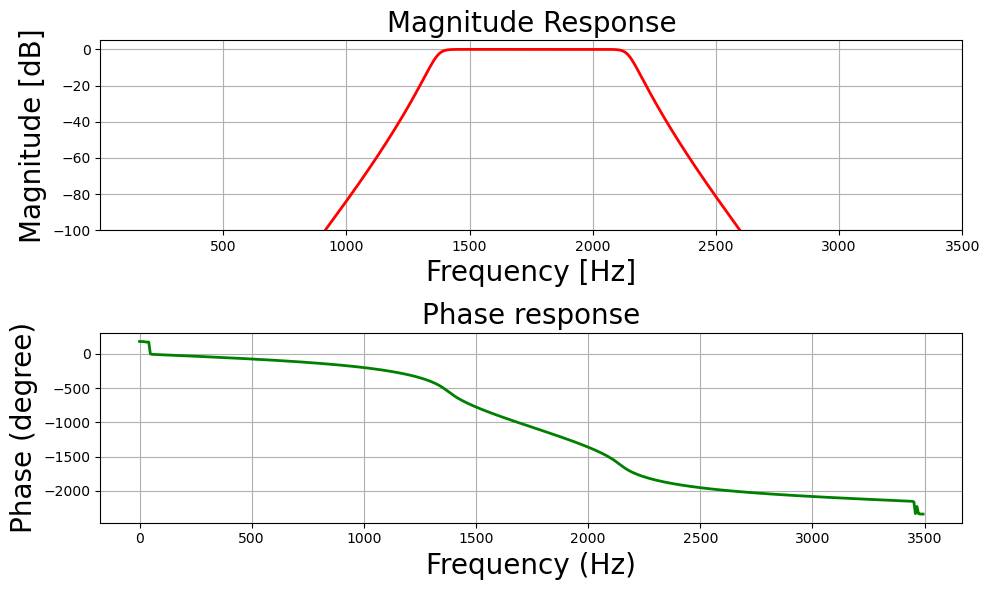

In [14]:
# Depicting visualizations by calling mfreqz to plot the magnitude and phase response
mfreqz(z, p, Fs)


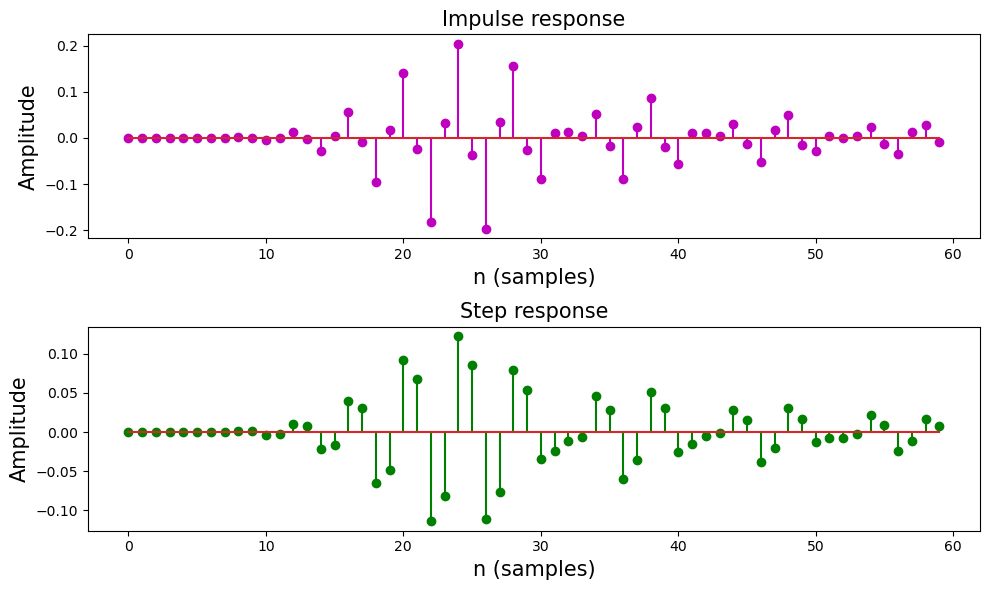

In [15]:
# Call impz function to plot impulse and step response of the filter
impz(z, p)